In [19]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_selection import RFE # for dimension reduction: recursive feature elimination 

In [20]:
#estimators
from sklearn.ensemble import RandomForestClassifier # for random forest model
from sklearn.svm import LinearSVC # for least squares support vecor machine model
from sklearn.neighbors import KNeighborsClassifier # for k-nearest neighbor model
from sklearn.naive_bayes import GaussianNB # for guassian naive bayes model
from sklearn.ensemble import AdaBoostClassifier # for Ada Boost model
from sklearn.ensemble import GradientBoostingClassifier #  for Gradient Boosting model



In [21]:
#model metrics
from sklearn.model_selection import cross_val_score

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

from sklearn.metrics import accuracy_score 
from sklearn.metrics import plot_confusion_matrix


In [22]:
# for sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# pip :  pip install -U imbalanced-learn

In [23]:
# for parameter tuning
from sklearn.model_selection import RandomizedSearchCV


In [24]:
# for stacking models
from sklearn.ensemble import StackingClassifier


In [25]:
#cross validation

from sklearn.model_selection import train_test_split # replaces deprecated code

In [26]:
#data
rawData = pd.read_csv('Preprocessed_Data.csv', header=0)
rawData.head()

,Unnamed: 0,id,limit,sex,edu,marriage,age,pay1,pay2,pay3,...,bill4,bill5,bill6,paid1,paid2,paid3,paid4,paid5,paid6,default
0,0,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Cleaning and Preprocessing

In [27]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
Unnamed: 0    30000 non-null int64
id            30000 non-null int64
limit         30000 non-null int64
sex           30000 non-null int64
edu           30000 non-null int64
marriage      30000 non-null int64
age           30000 non-null int64
pay1          30000 non-null int64
pay2          30000 non-null int64
pay3          30000 non-null int64
pay4          30000 non-null int64
pay5          30000 non-null int64
pay6          30000 non-null int64
bill1         30000 non-null int64
bill2         30000 non-null int64
bill3         30000 non-null int64
bill4         30000 non-null int64
bill5         30000 non-null int64
bill6         30000 non-null int64
paid1         30000 non-null int64
paid2         30000 non-null int64
paid3         30000 non-null int64
paid4         30000 non-null int64
paid5         30000 non-null int64
paid6         30000 non-null int64
default       30

## Convert Categorical Variables that are Numeric Types into Category Types

In [28]:
# Convert categorical variables that are inputted as numeric into categorical types
rawData['sex'] = rawData.sex.astype('category')
rawData['edu'] = rawData.edu.astype('category')
rawData['marriage'] = rawData.marriage.astype('category')
rawData['pay1'] = rawData.pay1.astype('category')
rawData['pay2'] = rawData.pay2.astype('category')
rawData['pay3'] = rawData.pay3.astype('category')
rawData['pay4'] = rawData.pay4.astype('category')
rawData['pay5'] = rawData.pay5.astype('category')
rawData['pay6'] = rawData.pay6.astype('category')
rawData['default'] = rawData.default.astype('category')

## Create Train and Test set

70% and 30% split
Train Set: X_train, y_train: 
 Test Set: X_test, y_test (also referred to as ground truth, used to test predictions on for performance)

In [29]:
X = rawData.iloc[:,2:24]
y = rawData['default']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

In [31]:
print('The number of observations in the Y training set are:',str(len(y_train.index)))


The number of observations in the Y training set are: 21000


In [32]:
print('The number of observations in the X training set are:',str(len(X_train.index)))


The number of observations in the X training set are: 21000


In [33]:
print('The number of observations in the X testing set are:',str(len(X_test.index)))


The number of observations in the X testing set are: 9000


In [34]:
print('The number of observations in the y testing set are:',str(len(y_test.index)))


The number of observations in the y testing set are: 9000


In [35]:
# verify split
len(X_test)/(len(X_test)+len(X_train))

0.3

In [36]:
# verify split
len(y_test)/(len(y_test)+len(y_train))

0.3

In [37]:
len(y_train)
len(y_test.index)

9000

## Note on Metrics

"Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial."

True Positive = A customer defaulted and we correctly identified that they defaulted. 
True Negative = A customer did not default and we correctly identified that they did not default.
False Positive = A customer did not default BUT we incorrectly identified that they defaulted. 
False Negative = A customer defaulted BUT we incorrectly identified that they did not default. 

This project came about because too many of our customers, who we approved, have defaulted on loans. This means that we have too many false negatives. Therefore, we will use performance metrics that focus on false negatives (F1 and recall). Our next concern will be false negatives. If we have too many false negatives, we will not approve customers who would otherwise have brought in revenue. It would be helpful if we could have an acceptable risk threshold for this scenario. Better safe than sorry may not apply if we deny too many customers and lose too much money. The metric we will use for false positives are F1 and precision. 

For this problem, accuracy will naturally be high since we have a natural class imbalance. Most of our customers do not default on loans. We will still consider accuracy, but, we will pay more attention to F1, recall, precision, and then accuracy. 


source: https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2

## Useful Functions

In [38]:
# function to reload data with correct category types
## purpose: prevent assignment mistakes


def loadData() :
    rawData = pd.read_csv('Preprocessed_Data.csv', header=0)

    ## change categorical variables to category type
    rawData['sex'] = rawData.sex.astype('category')
    rawData['edu'] = rawData.edu.astype('category')
    rawData['marriage'] = rawData.marriage.astype('category')
    rawData['pay1'] = rawData.pay1.astype('category')
    rawData['pay2'] = rawData.pay2.astype('category')
    rawData['pay3'] = rawData.pay3.astype('category')
    rawData['pay4'] = rawData.pay4.astype('category')
    rawData['pay5'] = rawData.pay5.astype('category')
    rawData['pay6'] = rawData.pay6.astype('category')
    rawData['default'] = rawData.default.astype('category')
    
    return rawData


In [39]:
# function to create a pandas dataframe, with prediction results and actual results

# modelInitial_string is the initial of the model. Ex: 'rf' is for random forest
# predictions is the predictions object from the model. Ex: predictions_rf is created when we run the .predict() on the random forest model
# y_test is the default rows (test data), created during train test split step

def predDF(modelInitial_string, predictions, y_test ) :
    predColumnName = 'predictions_' + modelInitial_string
    redColNam = 'results_' + modelInitial_string
    predictions_df = pd.DataFrame(predictions)
    predictions_df.columns = [predColumnName]
    predictions_df.reset_index(drop=True, inplace=True)
    ytest_df = pd.DataFrame(y_test)
    ytest_df.columns = ['actualResults']
    ytest_df.reset_index(drop=True, inplace=True)
    res = [ytest_df,predictions_df]
    redColNam = pd.concat(res,sort=False, axis = 1)
    print (redColNam.columns)
    return redColNam

In [40]:
# function for my metrics

#modelName : name of algorithm as a string, can be initial or full name
#y_test : test set of target variable
# modelPredictions : model predictions, output of .predict()

def myMetrics(modelName_str, y_test, modelPredictions) :
    f1Score = f1_score(y_test, modelPredictions, average="binary")
    recallScore = recall_score(y_test, modelPredictions, average="binary")
    precision = precision_score(y_test, modelPredictions, average="binary")
    accuracyScore = accuracy_score(y_test, modelPredictions)
    print(f"Recall : The {modelName} model correctly identifed all customer who defaulted {recallScore:.5f} of the time.")
    print(f"F1score for {modelName} model: {f1Score:.5f} ")
    print(f"Precision for {modelName} model: {precision:.5f} ")
    print(f"Accuracy for {modelName} model: {accuracyScore:.5f} ")

In [41]:
# Function to Evaluate Model, used for parameter tuning 
# model : fitted model, using x_train and y_train
#modelName : name of algorithm as a string, can be initial or full name
#x_test : features in test set
#y_test : target variable in test set

def evaluate(model,model_name, x_test, y_test):
    predictions = model.predict(x_test)
    recall= recall_score(y_test, predictions, average="binary", zero_division=1)
    f1 = f1_score(y_test, predictions, average="binary", zero_division = 1)
    print(f"The {model_name} model correctly identifed all customer who defaulted {recall:.5f} of the time.")
    print(f"The {model_name} model has an f1 score of {f1:.5f} .") 

    return f1

# 1st Attempt - Out of the Box - 4 Models

Which algorithms should we try?

- Linear Classifiers: Logistic regression, Naive Bayes classifier, Fisher’s linear discriminant
- Support vector machines: Least squares support vector machines
- Quadratic classifiers
- Kernel estimation: k-nearest neighbor 
- Decision trees: Random forests
- Neural networks
- Learning vector quantization

## Random Forest

In [42]:
# Random Forest Model 
modelName = 'rf'
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X_train, y_train)
predictions_rf= rf_model.predict(X_test)
results_rf = predDF('rf',predictions_rf, y_test )
myMetrics(modelName, y_test, predictions_rf)

Index(['actualResults', 'predictions_rf'], dtype='object')
Recall : The rf model correctly identifed all customer who defaulted 0.20204 of the time.
F1score for rf model: 0.31292 
Precision for rf model: 0.69352 
Accuracy for rf model: 0.80678 


## Least Squares Support Vector Machine

In [43]:
# Least Squares Support Vector Machine
modelName = 'lssVM'
lssVM_model = LinearSVC(random_state=0, tol=1000)
lssVM_model.fit(X_train, y_train)
predictions_lssVM= lssVM_model.predict(X_test)
results_lssVM = predDF(modelName,predictions_lssVM, y_test )
myMetrics(modelName, y_test, predictions_lssVM)

Index(['actualResults', 'predictions_lssVM'], dtype='object')
Recall : The lssVM model correctly identifed all customer who defaulted 0.05000 of the time.
F1score for lssVM model: 0.08544 
Precision for lssVM model: 0.29341 
Accuracy for lssVM model: 0.76689 


## K- Nearest Neighbor

In [44]:
# K- Nearest Neighbor
modelName = 'knn'
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
predictions_knn = knn_model.predict(X_test)
results_knn = predDF(modelName,predictions_knn, y_test )
myMetrics(modelName, y_test, predictions_knn)

Index(['actualResults', 'predictions_knn'], dtype='object')
Recall : The knn model correctly identifed all customer who defaulted 0.22704 of the time.
F1score for knn model: 0.27176 
Precision for knn model: 0.33840 
Accuracy for knn model: 0.73500 


## Gaussian Naive Bayes

In [45]:
# Gaussian Naive Bayes
modelName = 'gnb'
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
predictions_gnb=gnb_model.predict(X_test)
results_gnb = predDF(modelName,predictions_gnb, y_test )
myMetrics(modelName, y_test, predictions_gnb)

Index(['actualResults', 'predictions_gnb'], dtype='object')
Recall : The gnb model correctly identifed all customer who defaulted 0.86429 of the time.
F1score for gnb model: 0.38326 
Precision for gnb model: 0.24622 
Accuracy for gnb model: 0.39422 


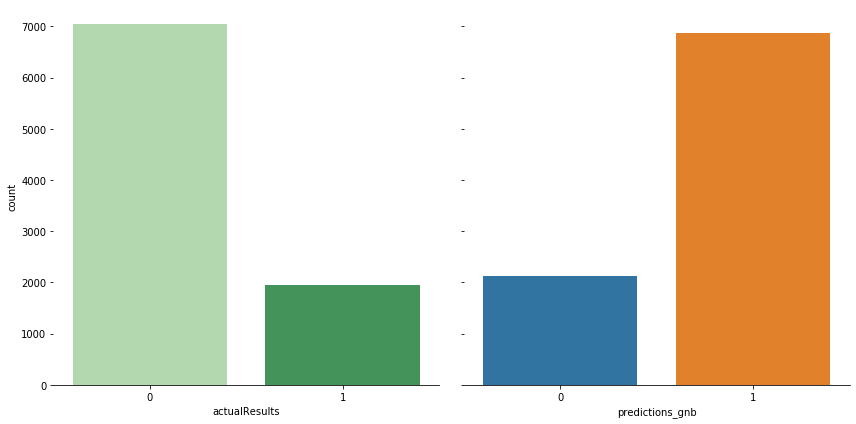

In [46]:
fig, axes = plt.subplots(1,2, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_gnb, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_gnb', data = results_gnb, ax=axes[1] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

Text(0.5, 1.0, 'Gaussian Naive Bayes Predictions')

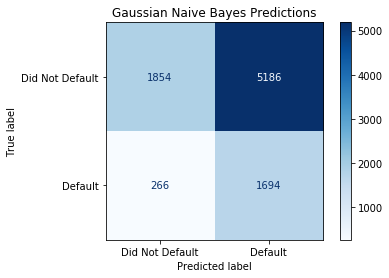

In [47]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(gnb_model, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("Gaussian Naive Bayes Predictions")

## Ada Boost

In [48]:
# Ada Boost
modelName = 'ada'
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
predictions_ada=ada_model.predict(X_test)
results_ada = predDF(modelName,predictions_ada, y_test )
myMetrics(modelName, y_test, predictions_ada)

Index(['actualResults', 'predictions_ada'], dtype='object')
Recall : The ada model correctly identifed all customer who defaulted 0.30612 of the time.
F1score for ada model: 0.42076 
Precision for ada model: 0.67265 
Accuracy for ada model: 0.81644 


## Gradient Tree Boosting

In [49]:
# GTB Boost
modelName = 'gtb'
gtb_model = GradientBoostingClassifier()
gtb_model.fit(X_train, y_train)
predictions_gtb=gtb_model.predict(X_test)
results_gtb = predDF(modelName,predictions_gtb, y_test )
myMetrics(modelName, y_test, predictions_gtb)

Index(['actualResults', 'predictions_gtb'], dtype='object')
Recall : The gtb model correctly identifed all customer who defaulted 0.35663 of the time.
F1score for gtb model: 0.46399 
Precision for gtb model: 0.66382 
Accuracy for gtb model: 0.82056 


### Combined Bar Chart of Models: Actual vs Predictions

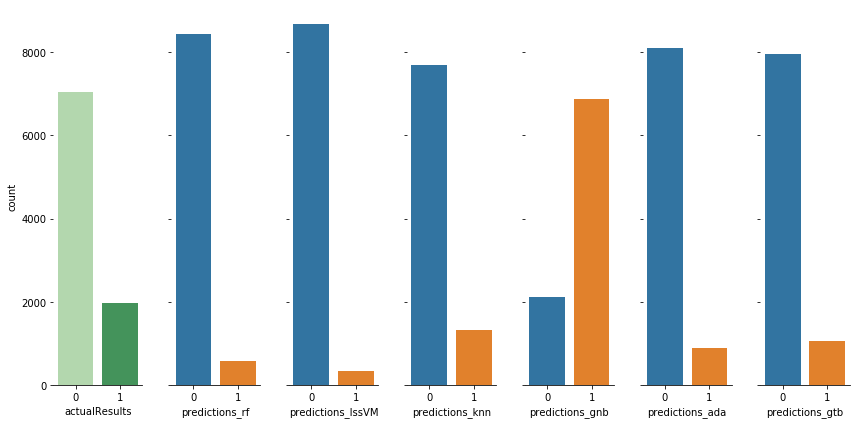

In [50]:
fig, axes = plt.subplots(1,7, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_rf, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_rf', data = results_rf, ax=axes[1] )
sns.countplot(x='predictions_lssVM', data =results_lssVM, ax=axes[2] )
sns.countplot(x='predictions_knn', data = results_knn, ax=axes[3] )
sns.countplot(x='predictions_gnb', data = results_gnb, ax=axes[4] )
sns.countplot(x='predictions_ada', data = results_ada, ax=axes[5] )
sns.countplot(x='predictions_gtb', data = results_gtb, ax=axes[6] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

Algorithms to Remove:
- Least Sqaures Support Vector Machine
- Guassian Naive Bayes

Algorithms to Keep:
- Random Forest
- K-Nearest Neighbor
- Ada Boost
- Gradient Tree Boosting


# 2nd Attempt - Multicollinearity - 3 Models

While doing the EDA, I thought of several ways to improve the models:

- Dimension Reduction
 - Multicollinearity : Remove monthly bill columns as they were highly correlated with each other
 - Apply Recursive Feature Elimination
- Remove outliers
- Class Imbalance Techniques
- Hyper-parameter tuning

The first technique I will try in improving this model is by reducing the dimensions. Are there any improvements when removing highly correlated variables?

Per the EDA, bills1 - bills 6 were highly correlated with each other, with pearson correlation scores of .8 and higher. I will test the models without these features. 


In [51]:
# start with 'clean' data
rawData = loadData()

In [52]:
# remove bills from features
cols = ['limit', 'sex', 'edu', 'marriage', 'age', 'pay1',
       'pay2', 'pay3', 'pay4', 'pay5', 'pay6', 'paid1', 'paid2', 'paid3', 'paid4', 'paid5',
       'paid6']

In [53]:
X = rawData[cols]
y = rawData['default']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

## Random Forest

In [55]:
# Random Forest Model 
modelName = 'rf_multiColl'
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X_train, y_train)
predictions_rf= rf_model.predict(X_test)
results_rf = predDF(modelName,predictions_rf, y_test )
myMetrics(modelName, y_test, predictions_rf)

Index(['actualResults', 'predictions_rf_multiColl'], dtype='object')
Recall : The rf_multiColl model correctly identifed all customer who defaulted 0.19643 of the time.
F1score for rf_multiColl model: 0.30616 
Precision for rf_multiColl model: 0.69369 
Accuracy for rf_multiColl model: 0.80611 


## K- Nearest Neighbor

In [56]:
# K- Nearest Neighbor
modelName = 'knn_multiColl'
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
predictions_knn = knn_model.predict(X_test)
results_knn = predDF(modelName,predictions_knn, y_test )
myMetrics(modelName, y_test, predictions_knn)

Index(['actualResults', 'predictions_knn_multiColl'], dtype='object')
Recall : The knn_multiColl model correctly identifed all customer who defaulted 0.21939 of the time.
F1score for knn_multiColl model: 0.26833 
Precision for knn_multiColl model: 0.34538 
Accuracy for knn_multiColl model: 0.73944 


## Gaussian Naive Bayes

In [57]:
# Gaussian Naive Bayes
modelName = 'gnb_nultiCOll'
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
predictions_gnb=gnb_model.predict(X_test)
results_gnb = predDF(modelName,predictions_gnb, y_test )
myMetrics(modelName, y_test, predictions_gnb)

Index(['actualResults', 'predictions_gnb_nultiCOll'], dtype='object')
Recall : The gnb_nultiCOll model correctly identifed all customer who defaulted 0.89541 of the time.
F1score for gnb_nultiCOll model: 0.38323 
Precision for gnb_nultiCOll model: 0.24378 
Accuracy for gnb_nultiCOll model: 0.37233 


## Ada Boost

In [58]:
# Ada Boost
modelName = 'ada_multiColl'
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
predictions_ada=ada_model.predict(X_test)
results_ada = predDF(modelName,predictions_ada, y_test )
myMetrics(modelName, y_test, predictions_ada)

Index(['actualResults', 'predictions_ada_multiColl'], dtype='object')
Recall : The ada_multiColl model correctly identifed all customer who defaulted 0.32245 of the time.
F1score for ada_multiColl model: 0.43496 
Precision for ada_multiColl model: 0.66808 
Accuracy for ada_multiColl model: 0.81756 


## Gradient Tree Boosting

In [59]:
# GTB Boost
modelName = 'gtb_multiColl'
gtb_model = GradientBoostingClassifier()
gtb_model.fit(X_train, y_train)
predictions_gtb=gtb_model.predict(X_test)
results_gtb = predDF(modelName,predictions_gtb, y_test )
myMetrics(modelName, y_test, predictions_gtb)

Index(['actualResults', 'predictions_gtb_multiColl'], dtype='object')
Recall : The gtb_multiColl model correctly identifed all customer who defaulted 0.35408 of the time.
F1score for gtb_multiColl model: 0.46220 
Precision for gtb_multiColl model: 0.66539 
Accuracy for gtb_multiColl model: 0.82056 


### Combined Bar Chart of Models: Actual vs Predictions

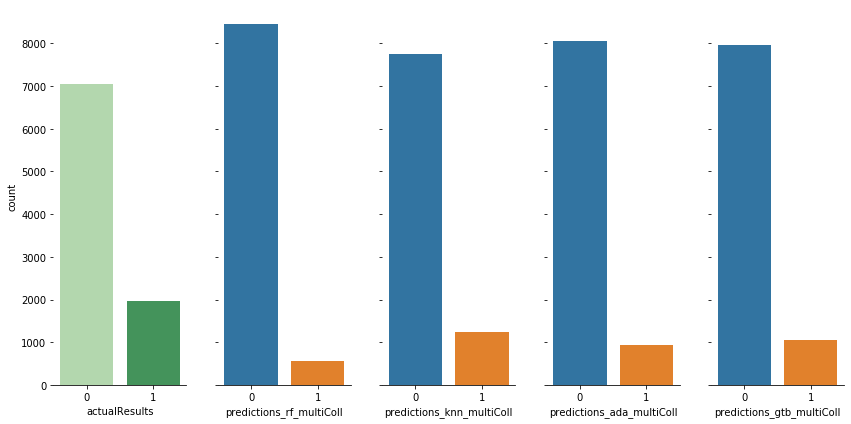

In [60]:
fig, axes = plt.subplots(1,5, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_rf, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_rf_multiColl', data = results_rf, ax=axes[1] )
sns.countplot(x='predictions_knn_multiColl', data = results_knn, ax=axes[2] )
sns.countplot(x='predictions_ada_multiColl', data = results_ada, ax=axes[3] )
sns.countplot(x='predictions_gtb_multiColl', data = results_gtb, ax=axes[4] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

# 3rd Attempt - Recursive Feature Elimination - 3 Models


There are several techniques we can use to address dimension reduction, in particular, principal component analysis and recursive feature elimination. I chose RFE over PCA because I discovered during the EDA that the no features had significant low variance. 

With RFE, I will look for the top 20 features. 

In [61]:
# start with 'clean' data
rawData = loadData()

In [62]:
X = rawData.iloc[:,2:24]
y = rawData['default']

In [63]:
X.columns

Index(['limit', 'sex', 'edu', 'marriage', 'age', 'pay1', 'pay2', 'pay3',
       'pay4', 'pay5', 'pay6', 'bill1', 'bill2', 'bill3', 'bill4', 'bill5',
       'bill6', 'paid1', 'paid2', 'paid3', 'paid4', 'paid5'],
      dtype='object')

In [64]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: category
Categories (2, int64): [0, 1]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

## Random Forest

In [66]:
# Feature extraction
model = RandomForestClassifier()
rfe = RFE(model, 20)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


Num Features: 20
Selected Features: [ True False  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
Feature Ranking: [1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [67]:
print("All Features: %s" % (X_train.columns) )


All Features: Index(['limit', 'sex', 'edu', 'marriage', 'age', 'pay1', 'pay2', 'pay3',
       'pay4', 'pay5', 'pay6', 'bill1', 'bill2', 'bill3', 'bill4', 'bill5',
       'bill6', 'paid1', 'paid2', 'paid3', 'paid4', 'paid5'],
      dtype='object')


All are features play a role. Marriage is not as important and sex is the least important. 

In [68]:
# Run Random Forest with RFE Features Only
# Remove Sex and Marriage as Features
cols = ['limit', 'edu', 'age', 'pay1', 'pay2', 'pay3',
       'pay4', 'pay5', 'pay6', 'bill1', 'bill2', 'bill3', 'bill4', 'bill5',
       'bill6', 'paid1', 'paid2', 'paid3', 'paid4', 'paid5']

X = rawData[cols]
y = rawData['default']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

In [70]:
# Random Forest Model 
modelName = 'rf_rfe'
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X_train, y_train)
predictions_rf= rf_model.predict(X_test)
results_rf = predDF(modelName,predictions_rf, y_test )
myMetrics(modelName, y_test, predictions_rf)

Index(['actualResults', 'predictions_rf_rfe'], dtype='object')
Recall : The rf_rfe model correctly identifed all customer who defaulted 0.17806 of the time.
F1score for rf_rfe model: 0.28443 
Precision for rf_rfe model: 0.70648 
Accuracy for rf_rfe model: 0.80489 


## Ada Boost

In [71]:
# Feature extraction
model = AdaBoostClassifier()
rfe = RFE(model, 20)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


Num Features: 20
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [72]:
print("All Features: %s" % (X_train.columns) )


All Features: Index(['limit', 'edu', 'age', 'pay1', 'pay2', 'pay3', 'pay4', 'pay5', 'pay6',
       'bill1', 'bill2', 'bill3', 'bill4', 'bill5', 'bill6', 'paid1', 'paid2',
       'paid3', 'paid4', 'paid5'],
      dtype='object')


All are features are important. 

## Gradient Tree Boosting

In [73]:
# Feature extraction
model = GradientBoostingClassifier()
rfe = RFE(model, 20)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


Num Features: 20
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [74]:
print("All Features: %s" % (X_train.columns) )


All Features: Index(['limit', 'edu', 'age', 'pay1', 'pay2', 'pay3', 'pay4', 'pay5', 'pay6',
       'bill1', 'bill2', 'bill3', 'bill4', 'bill5', 'bill6', 'paid1', 'paid2',
       'paid3', 'paid4', 'paid5'],
      dtype='object')


All are features are important. 

## RFE: KNN and GNG

KNN does not support RFE. 

Using rfe significantly worsened the random forest model.

# 4th Attempt - Remove Outliers - 4 Models

The next approach I will take to improve the models is to remove outliers, which I identified during the EDA. I will start
Continuous 
 - Limit (remove limits higher than 525,000 per IQR test)
 - Monthly Payments
 
 
Results of IQR test for Outliers (from EDA): 

lowOutliers: -235000.0 highOutliers: 525000.0
 
Results of IQR test for Monthly Payments:
lowOutliers: -5009.0 highOutliers: 11015.0
lowOutliers: -5417.5 highOutliers: 11250.5
lowOutliers: -5782.5 highOutliers: 10677.5
lowOutliers: -5279.875 highOutliers: 9589.125
lowOutliers: -5416.0 highOutliers: 9700.0
lowOutliers: -5705.625 highOutliers: 9823.375
 
* No limits amounts or monthly payments were negative (credits) so no need to remove low outliers.  

In [75]:
# start with 'clean' data
rawData = loadData()
# number of customers
len(rawData.index)

30000

In [76]:
# Remove outliers
rawData = rawData[rawData.limit < 525000]
rawData = rawData[rawData.paid1 < 11015.0]
rawData = rawData[rawData.paid2 < 11250.5]
rawData = rawData[rawData.paid3 < 10677.5]
rawData = rawData[rawData.paid4 < 9589.125]
rawData = rawData[rawData.paid5 < 9700.0]
rawData = rawData[rawData.paid6 < 9823.375]

In [77]:
# Number of customers after removing outliers
len(rawData.index)

21242

In [78]:
X = rawData.iloc[:,2:24]
y = rawData['default']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

### Random Forest without Outliers Removed

In [80]:
# Random Forest Model 
modelName = 'rf_noOut'
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X_train, y_train)
predictions_rf= rf_model.predict(X_test)
results_rf = predDF(modelName,predictions_rf, y_test )
myMetrics(modelName, y_test, predictions_rf)

Index(['actualResults', 'predictions_rf_noOut'], dtype='object')
Recall : The rf_noOut model correctly identifed all customer who defaulted 0.25600 of the time.
F1score for rf_noOut model: 0.37562 
Precision for rf_noOut model: 0.70508 
Accuracy for rf_noOut model: 0.78299 


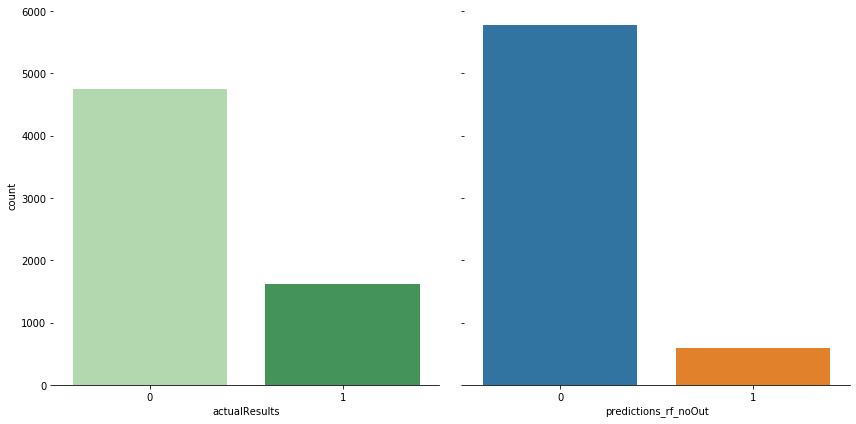

In [81]:
fig, axes = plt.subplots(1,2, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_rf, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_rf_noOut', data = results_rf, ax=axes[1] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

Text(0.5, 1.0, 'Random Forest Predictions after Removing Outliers')

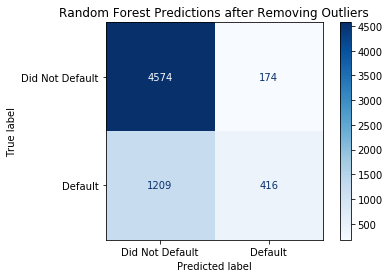

In [82]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(rf_model, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("Random Forest Predictions after Removing Outliers")

### K-Nearest Neighbors without Outliers

In [83]:
# K- Nearest Neighbor
modelName = 'knn_noOut'
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
predictions_knn = knn_model.predict(X_test)
results_knn = predDF(modelName,predictions_knn, y_test )
myMetrics(modelName, y_test, predictions_knn)

Index(['actualResults', 'predictions_knn_noOut'], dtype='object')
Recall : The knn_noOut model correctly identifed all customer who defaulted 0.26277 of the time.
F1score for knn_noOut model: 0.31157 
Precision for knn_noOut model: 0.38262 
Accuracy for knn_noOut model: 0.70391 


Text(0.5, 1.0, 'KNN Predictions after Removing Outliers')

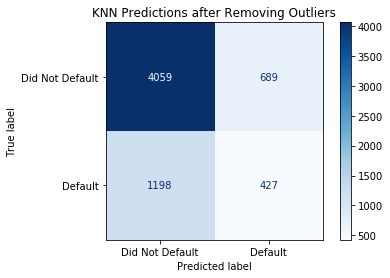

In [84]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(knn_model, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("KNN Predictions after Removing Outliers")

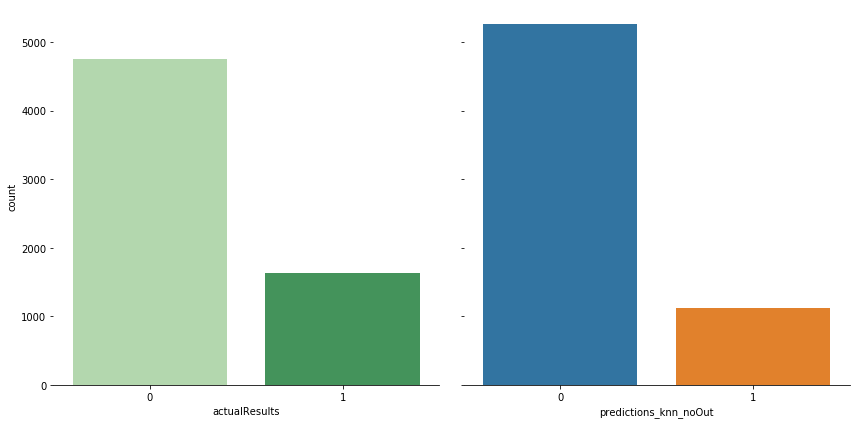

In [85]:
fig, axes = plt.subplots(1,2, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_knn, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_knn_noOut', data = results_knn, ax=axes[1] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

### Gaussian Naive Bayes

In [86]:
# Gaussian Naive Bayes
modelName = 'gnb_noOut'
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
predictions_gnb=gnb_model.predict(X_test)
results_gnb = predDF(modelName,predictions_gnb, y_test )
myMetrics(modelName, y_test, predictions_gnb)

Index(['actualResults', 'predictions_gnb_noOut'], dtype='object')
Recall : The gnb_noOut model correctly identifed all customer who defaulted 0.54031 of the time.
F1score for gnb_noOut model: 0.42385 
Precision for gnb_noOut model: 0.34869 
Accuracy for gnb_noOut model: 0.62545 


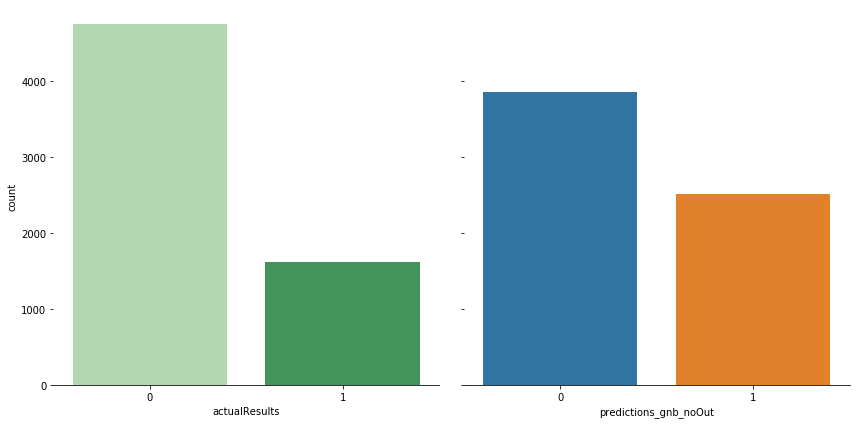

In [87]:
fig, axes = plt.subplots(1,2, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_gnb, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_gnb_noOut', data = results_gnb, ax=axes[1] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

Text(0.5, 1.0, 'Gaussian Naive Bayes Predictions after Removing Outliers')

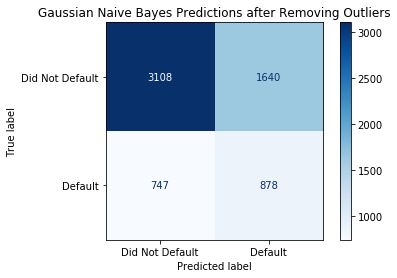

In [88]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(gnb_model, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("Gaussian Naive Bayes Predictions after Removing Outliers")

### AdaBoost without Outliers

In [89]:
# Ada Boost
modelName = 'ada_noOut'
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
predictions_ada=ada_model.predict(X_test)
results_ada = predDF(modelName,predictions_ada, y_test )
myMetrics(modelName, y_test, predictions_ada)

Index(['actualResults', 'predictions_ada_noOut'], dtype='object')
Recall : The ada_noOut model correctly identifed all customer who defaulted 0.33292 of the time.
F1score for ada_noOut model: 0.44748 
Precision for ada_noOut model: 0.68222 
Accuracy for ada_noOut model: 0.79037 


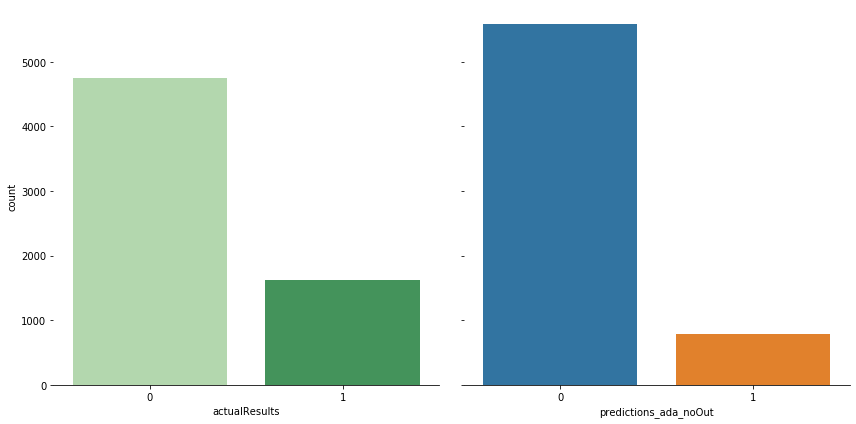

In [90]:
fig, axes = plt.subplots(1,2, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_ada, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_ada_noOut', data = results_ada, ax=axes[1] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

Text(0.5, 1.0, 'Ada Boost Predictions after Removing Outliers')

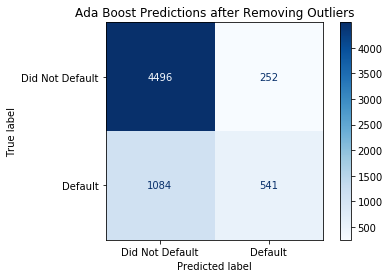

In [91]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(ada_model, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("Ada Boost Predictions after Removing Outliers")

### Gradient Tree Boosting without Outliers

In [92]:
# GTB Boost
modelName = 'gtb_noOut'
gtb_model = GradientBoostingClassifier()
gtb_model.fit(X_train, y_train)
predictions_gtb=gtb_model.predict(X_test)
results_gtb = predDF(modelName,predictions_gtb, y_test )
myMetrics(modelName, y_test, predictions_gtb)

Index(['actualResults', 'predictions_gtb_noOut'], dtype='object')
Recall : The gtb_noOut model correctly identifed all customer who defaulted 0.38831 of the time.
F1score for gtb_noOut model: 0.49413 
Precision for gtb_noOut model: 0.67922 
Accuracy for gtb_noOut model: 0.79727 


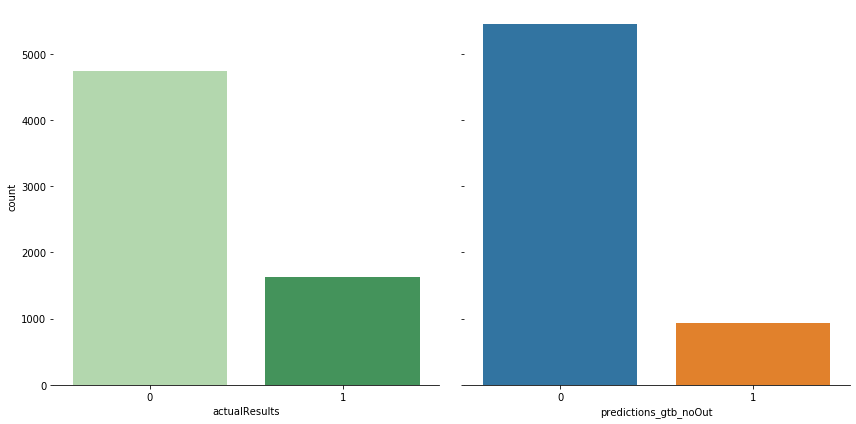

In [93]:
fig, axes = plt.subplots(1,2, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_gtb, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_gtb_noOut', data = results_gtb, ax=axes[1] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

Text(0.5, 1.0, 'Gradient Boosting Predictions after Removing Outliers')

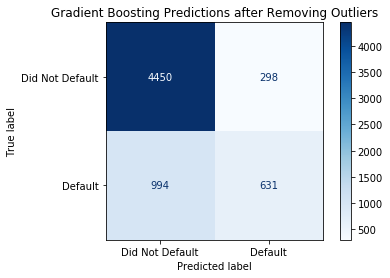

In [94]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(gtb_model, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("Gradient Boosting Predictions after Removing Outliers")

### Combined Bar Chart of Models: Actual vs Predictions

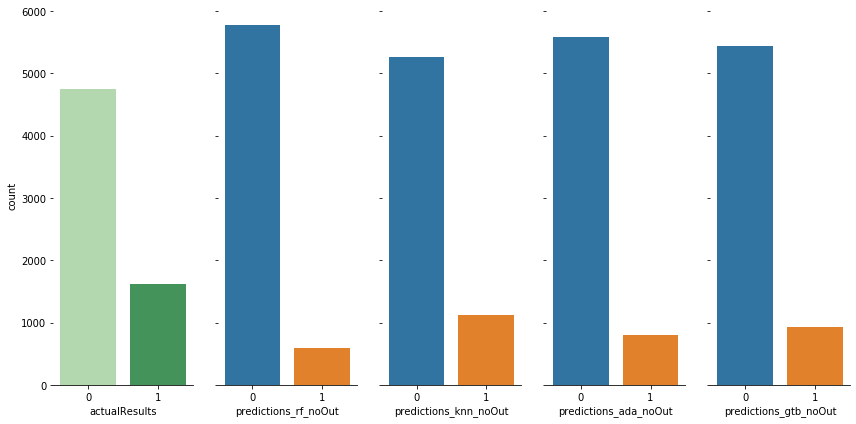

In [95]:
fig, axes = plt.subplots(1,5, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_rf, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_rf_noOut', data = results_rf, ax=axes[1] )
sns.countplot(x='predictions_knn_noOut', data = results_knn, ax=axes[2] )
sns.countplot(x='predictions_ada_noOut', data = results_ada, ax=axes[3] )
sns.countplot(x='predictions_gtb_noOut', data = results_gtb, ax=axes[4] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

# 5th Attempt - Address Class Imbalances - 4 Models


How does address class imbalance improve our models?

source: https://heartbeat.fritz.ai/resampling-to-properly-handle-imbalanced-datasets-in-machine-learning-64d82c16ceaa

In [96]:
# start with 'clean' data
rawData = loadData()
# number of customers
len(rawData.index)

30000

In [97]:
X = rawData.iloc[:,2:24]
y = rawData['default']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

In [99]:
len(y_train)

21000

In [100]:
y_train.value_counts()

0    16324
1     4676
Name: default, dtype: int64

## Random Oversampling

source: https://heartbeat.fritz.ai/resampling-to-properly-handle-imbalanced-datasets-in-machine-learning-64d82c16ceaa

In [101]:
# create the object.
over_sampler = RandomOverSampler()
# fit the object to the training data.
x_train_over, y_train_over = over_sampler.fit_sample(X_train, y_train)

In [102]:
len(y_train_over)

32648

In [103]:
y_train_over.value_counts()

1    16324
0    16324
Name: default, dtype: int64

### Random Forest - Class Imbalance

In [104]:
# Random Forest Model 
modelName = 'rf_randOver'
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(x_train_over, y_train_over) # train_over
predictions_rf= rf_model.predict(X_test)
results_rf = predDF(modelName,predictions_rf, y_test )
myMetrics(modelName, y_test, predictions_rf)

Index(['actualResults', 'predictions_rf_randOver'], dtype='object')
Recall : The rf_randOver model correctly identifed all customer who defaulted 0.57551 of the time.
F1score for rf_randOver model: 0.52259 
Precision for rf_randOver model: 0.47857 
Accuracy for rf_randOver model: 0.77100 


### K-Nearest Neighbor - Class Imbalance

In [105]:
# K- Nearest Neighbor
modelName = 'knn_randOver'
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_over, y_train_over)
predictions_knn = knn_model.predict(X_test)
results_knn = predDF(modelName,predictions_knn, y_test )
myMetrics(modelName, y_test, predictions_knn)

Index(['actualResults', 'predictions_knn_randOver'], dtype='object')
Recall : The knn_randOver model correctly identifed all customer who defaulted 0.46429 of the time.
F1score for knn_randOver model: 0.34733 
Precision for knn_randOver model: 0.27744 
Accuracy for knn_randOver model: 0.62000 


### Gaussian Naive Bayes - Class Imbalance

In [106]:
# Gaussian Naive Bayes
modelName = 'gnb_randOver'
gnb_model = GaussianNB()
gnb_model.fit(x_train_over, y_train_over)
predictions_gnb=gnb_model.predict(X_test)
results_gnb = predDF(modelName,predictions_gnb, y_test )
myMetrics(modelName, y_test, predictions_gnb)

Index(['actualResults', 'predictions_gnb_randOver'], dtype='object')
Recall : The gnb_randOver model correctly identifed all customer who defaulted 0.91888 of the time.
F1score for gnb_randOver model: 0.37451 
Precision for gnb_randOver model: 0.23518 
Accuracy for gnb_randOver model: 0.33156 


### AdaBoost - Class Imbalance

In [107]:
# Ada Boost
modelName = 'ada_randOver'
ada_model = AdaBoostClassifier()
ada_model.fit(x_train_over, y_train_over)
predictions_ada=ada_model.predict(X_test)
results_ada = predDF(modelName,predictions_ada, y_test )
myMetrics(modelName, y_test, predictions_ada)

Index(['actualResults', 'predictions_ada_randOver'], dtype='object')
Recall : The ada_randOver model correctly identifed all customer who defaulted 0.61122 of the time.
F1score for ada_randOver model: 0.52144 
Precision for ada_randOver model: 0.45465 
Accuracy for ada_randOver model: 0.75567 


### Gradient Tree Boosting - Class Imbalance

In [108]:
# GTB Boost
modelName = 'gtb_randOver'
gtb_model = GradientBoostingClassifier()
gtb_model.fit(x_train_over, y_train_over)
predictions_gtb=gtb_model.predict(X_test)
results_gtb = predDF(modelName,predictions_gtb, y_test )
myMetrics(modelName, y_test, predictions_gtb)

Index(['actualResults', 'predictions_gtb_randOver'], dtype='object')
Recall : The gtb_randOver model correctly identifed all customer who defaulted 0.62347 of the time.
F1score for gtb_randOver model: 0.52604 
Precision for gtb_randOver model: 0.45495 
Accuracy for gtb_randOver model: 0.75533 


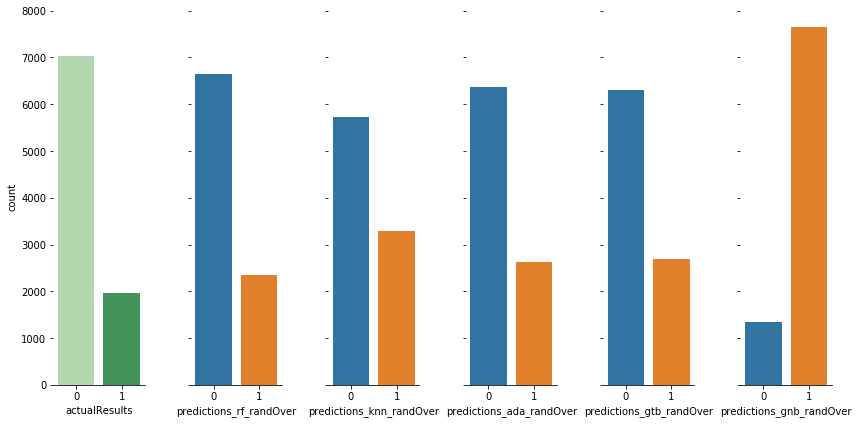

In [109]:
fig, axes = plt.subplots(1,6, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_rf, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_rf_randOver', data = results_rf, ax=axes[1] )
sns.countplot(x='predictions_knn_randOver', data = results_knn, ax=axes[2] )
sns.countplot(x='predictions_ada_randOver', data = results_ada, ax=axes[3] )
sns.countplot(x='predictions_gtb_randOver', data = results_gtb, ax=axes[4] )
sns.countplot(x='predictions_gnb_randOver', data = results_gnb, ax=axes[5] )


fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

## Random Undersampling

In [110]:
under_sampler = RandomUnderSampler()

# fit the object to the training data.
x_train_under, y_train_under = under_sampler.fit_sample(X_train, y_train)

In [111]:
len(y_train_under)

9352

In [112]:
y_train_under.value_counts()

1    4676
0    4676
Name: default, dtype: int64

### Random Forest 

In [113]:
# Random Forest Model 
modelName = 'rf_randUnder'
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(x_train_over, y_train_over) # train_over
predictions_rf= rf_model.predict(X_test)
results_rf = predDF(modelName,predictions_rf, y_test )
myMetrics(modelName, y_test, predictions_rf)

Index(['actualResults', 'predictions_rf_randUnder'], dtype='object')
Recall : The rf_randUnder model correctly identifed all customer who defaulted 0.57551 of the time.
F1score for rf_randUnder model: 0.52259 
Precision for rf_randUnder model: 0.47857 
Accuracy for rf_randUnder model: 0.77100 


Text(0.5, 1.0, 'RF, after Undersampling')

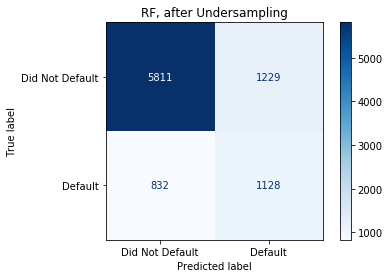

In [114]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(rf_model, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("RF, after Undersampling")

### K-Nearest Neighbor

In [115]:
# K- Nearest Neighbor
modelName = 'knn_randUnder'
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_over, y_train_over)
predictions_knn = knn_model.predict(X_test)
results_knn = predDF(modelName,predictions_knn, y_test )
myMetrics(modelName, y_test, predictions_knn)

Index(['actualResults', 'predictions_knn_randUnder'], dtype='object')
Recall : The knn_randUnder model correctly identifed all customer who defaulted 0.46429 of the time.
F1score for knn_randUnder model: 0.34733 
Precision for knn_randUnder model: 0.27744 
Accuracy for knn_randUnder model: 0.62000 


Text(0.5, 1.0, 'KNN, after Undersampling')

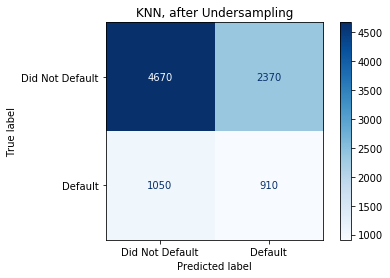

In [116]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(knn_model, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("KNN, after Undersampling")

### Gaussian Naive Bayes

In [117]:
# Gaussian Naive Bayes
modelName = 'gnb_randUnder'
gnb_model = GaussianNB()
gnb_model.fit(x_train_over, y_train_over)
predictions_gnb=gnb_model.predict(X_test)
results_gnb = predDF(modelName,predictions_gnb, y_test )
myMetrics(modelName, y_test, predictions_gnb)

Index(['actualResults', 'predictions_gnb_randUnder'], dtype='object')
Recall : The gnb_randUnder model correctly identifed all customer who defaulted 0.91888 of the time.
F1score for gnb_randUnder model: 0.37451 
Precision for gnb_randUnder model: 0.23518 
Accuracy for gnb_randUnder model: 0.33156 


Text(0.5, 1.0, 'GNB, after Undersampling')

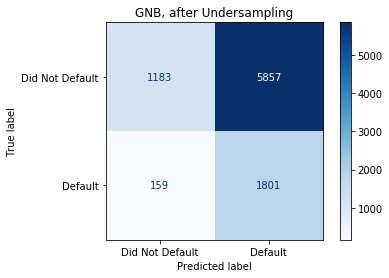

In [118]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(gnb_model, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("GNB, after Undersampling")

### AdaBoost 

In [119]:
# Ada Boost
modelName = 'ada_randUnder'
ada_model = AdaBoostClassifier()
ada_model.fit(x_train_over, y_train_over)
predictions_ada=ada_model.predict(X_test)
results_ada = predDF(modelName,predictions_ada, y_test )
myMetrics(modelName, y_test, predictions_ada)

Index(['actualResults', 'predictions_ada_randUnder'], dtype='object')
Recall : The ada_randUnder model correctly identifed all customer who defaulted 0.61122 of the time.
F1score for ada_randUnder model: 0.52144 
Precision for ada_randUnder model: 0.45465 
Accuracy for ada_randUnder model: 0.75567 


Text(0.5, 1.0, 'ADA, after Undersampling')

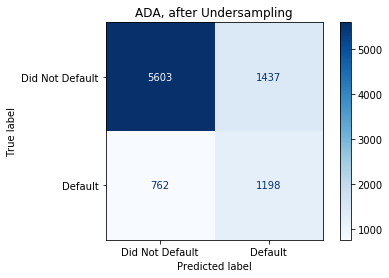

In [120]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(ada_model, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("ADA, after Undersampling")

### Gradient Tree Boosting

In [121]:
# GTB Boost
modelName = 'gtb_randUnder'
gtb_model = GradientBoostingClassifier()
gtb_model.fit(x_train_over, y_train_over)
predictions_gtb=gtb_model.predict(X_test)
results_gtb = predDF(modelName,predictions_gtb, y_test )
myMetrics(modelName, y_test, predictions_gtb)

Index(['actualResults', 'predictions_gtb_randUnder'], dtype='object')
Recall : The gtb_randUnder model correctly identifed all customer who defaulted 0.62347 of the time.
F1score for gtb_randUnder model: 0.52604 
Precision for gtb_randUnder model: 0.45495 
Accuracy for gtb_randUnder model: 0.75533 


Text(0.5, 1.0, 'GTB, after Undersampling')

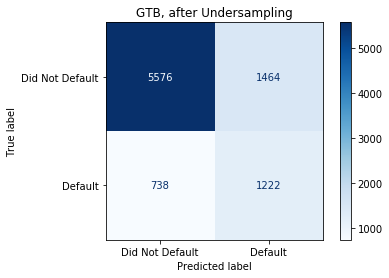

In [122]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(gtb_model, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("GTB, after Undersampling")

### Combined Bar Chart of Models: Actual vs Predictions

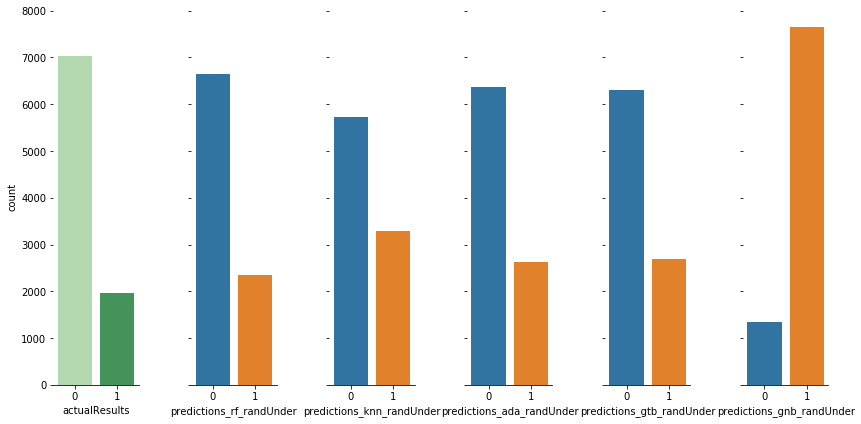

In [123]:
fig, axes = plt.subplots(1,6, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_rf, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_rf_randUnder', data = results_rf, ax=axes[1] )
sns.countplot(x='predictions_knn_randUnder', data = results_knn, ax=axes[2] )
sns.countplot(x='predictions_ada_randUnder', data = results_ada, ax=axes[3] )
sns.countplot(x='predictions_gtb_randUnder', data = results_gtb, ax=axes[4] )
sns.countplot(x='predictions_gnb_randUnder', data = results_gnb, ax=axes[5] )


fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

# Performance Improvement -  Remove Outliers and Random Sampling

In [124]:
# start with 'clean' data
rawData = loadData()
# number of customers
len(rawData.index)

30000

In [125]:
# Remove outliers
rawData = rawData[rawData.limit < 525000]
rawData = rawData[rawData.paid1 < 11015.0]
rawData = rawData[rawData.paid2 < 11250.5]
rawData = rawData[rawData.paid3 < 10677.5]
rawData = rawData[rawData.paid4 < 9589.125]
rawData = rawData[rawData.paid5 < 9700.0]
rawData = rawData[rawData.paid6 < 9823.375]

In [126]:
X = rawData.iloc[:,2:24]
y = rawData['default']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

In [128]:
len(y_train)

14869

In [129]:
y_train.value_counts()

0    11110
1     3759
Name: default, dtype: int64

In [130]:
# create the object.
over_sampler = RandomOverSampler()
# fit the object to the training data.
x_train_over, y_train_over = over_sampler.fit_sample(X_train, y_train)

In [131]:
len(y_train_over)

22220

In [132]:
y_train_over.value_counts()

1    11110
0    11110
Name: default, dtype: int64

In [133]:
under_sampler = RandomUnderSampler()

# fit the object to the training data.
x_train_under, y_train_under = under_sampler.fit_sample(X_train, y_train)

In [134]:
len(y_train_under)

7518

In [135]:
y_train_under.value_counts()

1    3759
0    3759
Name: default, dtype: int64

## Random Forest - Outliers, Oversampling

In [136]:
# Random Forest Model 
modelName = 'rf_Outliers_Oversampling'
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(x_train_over, y_train_over) # train_over
predictions_rf= rf_model.predict(X_test)
results_rf = predDF(modelName,predictions_rf, y_test )
myMetrics(modelName, y_test, predictions_rf)

Index(['actualResults', 'predictions_rf_Outliers_Oversampling'], dtype='object')
Recall : The rf_Outliers_Oversampling model correctly identifed all customer who defaulted 0.59446 of the time.
F1score for rf_Outliers_Oversampling model: 0.54087 
Precision for rf_Outliers_Oversampling model: 0.49615 
Accuracy for rf_Outliers_Oversampling model: 0.74266 


Text(0.5, 0.98, 'Ground Truth vs Random Forest Predictions after Oversampling & Removing Outliers')

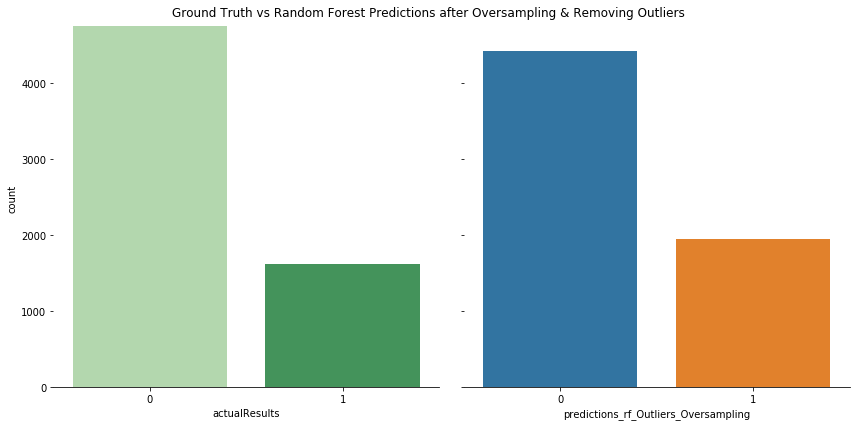

In [137]:
fig, axes = plt.subplots(1,2, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_rf, ax=axes[0] , palette="Greens")
sns.countplot(x='predictions_rf_Outliers_Oversampling', data = results_rf, ax=axes[1] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()
    
fig.suptitle("Ground Truth vs Random Forest Predictions after Oversampling & Removing Outliers")


Text(0.5, 1.0, 'Random Forest Predictions after Oversampling & Removing Outliers')

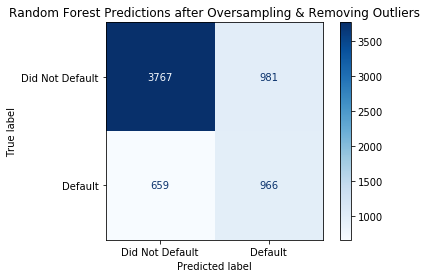

In [138]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(rf_model, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("Random Forest Predictions after Oversampling & Removing Outliers")


## Random Forest - Outliers, Undersampling
x_train_under, y_train_under


In [139]:
# Random Forest Model 
modelName = 'rf_o_u'
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(x_train_under, y_train_under) # train_over
predictions_rf= rf_model.predict(X_test)
results_rf = predDF(modelName,predictions_rf, y_test )
myMetrics(modelName, y_test, predictions_rf)

Index(['actualResults', 'predictions_rf_o_u'], dtype='object')
Recall : The rf_o_u model correctly identifed all customer who defaulted 0.58769 of the time.
F1score for rf_o_u model: 0.53909 
Precision for rf_o_u model: 0.49791 
Accuracy for rf_o_u model: 0.74376 


Text(0.5, 0.98, 'Ground Truth vs Random Forest Predictions after Undersampling & Removing Outliers')

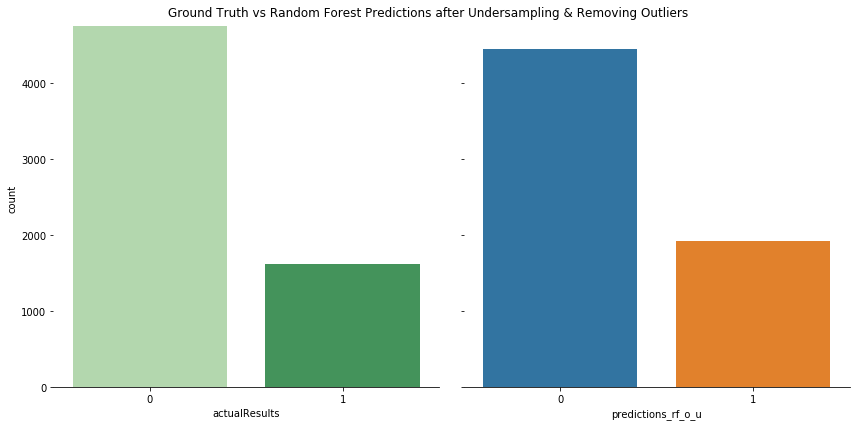

In [140]:
fig, axes = plt.subplots(1,2, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_rf, ax=axes[0] , palette="Greens")
sns.countplot(x='predictions_rf_o_u', data = results_rf, ax=axes[1] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()
    
fig.suptitle("Ground Truth vs Random Forest Predictions after Undersampling & Removing Outliers")


Text(0.5, 1.0, 'Random Forest Predictions after Undersampling & Removing Outliers')

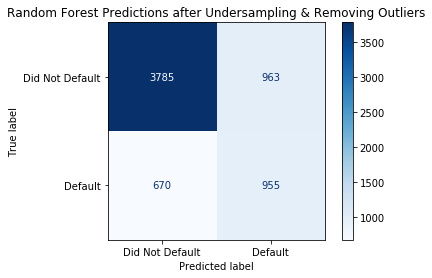

In [141]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(rf_model, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("Random Forest Predictions after Undersampling & Removing Outliers")


## KNN - Outliers, Undersampling
x_train_under, y_train_under


In [142]:
# K- Nearest Neighbor
modelName = 'knn_o_u'
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_under, y_train_under)
predictions_knn = knn_model.predict(X_test)
results_knn = predDF(modelName,predictions_knn, y_test )
myMetrics(modelName, y_test, predictions_knn)

Index(['actualResults', 'predictions_knn_o_u'], dtype='object')
Recall : The knn_o_u model correctly identifed all customer who defaulted 0.58400 of the time.
F1score for knn_o_u model: 0.40443 
Precision for knn_o_u model: 0.30932 
Accuracy for knn_o_u model: 0.56143 


Text(0.5, 1.0, 'KNN Predictions after Removing Outliers and Undersampling')

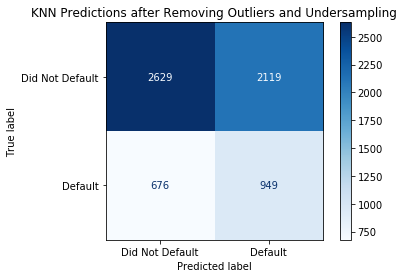

In [143]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(knn_model, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("KNN Predictions after Removing Outliers and Undersampling")

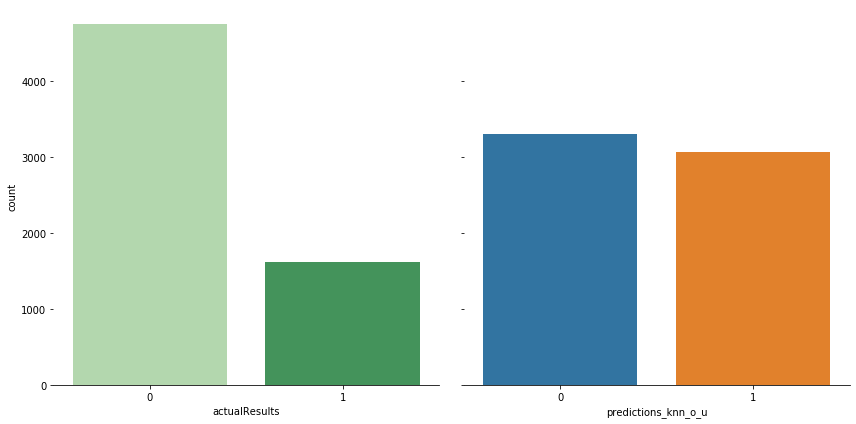

In [144]:
fig, axes = plt.subplots(1,2, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_knn, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_knn_o_u', data = results_knn, ax=axes[1] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

## Gaussian Naive Bayes - Outliers, Undersampling
x_train_under, y_train_under


In [145]:
# Gaussian Naive Bayes
modelName = 'gnb_o_u'
gnb_model = GaussianNB()
gnb_model.fit(x_train_under, y_train_under)
predictions_gnb=gnb_model.predict(X_test)
results_gnb = predDF(modelName,predictions_gnb, y_test )
myMetrics(modelName, y_test, predictions_gnb)

Index(['actualResults', 'predictions_gnb_o_u'], dtype='object')
Recall : The gnb_o_u model correctly identifed all customer who defaulted 0.74769 of the time.
F1score for gnb_o_u model: 0.42401 
Precision for gnb_o_u model: 0.29591 
Accuracy for gnb_o_u model: 0.48203 


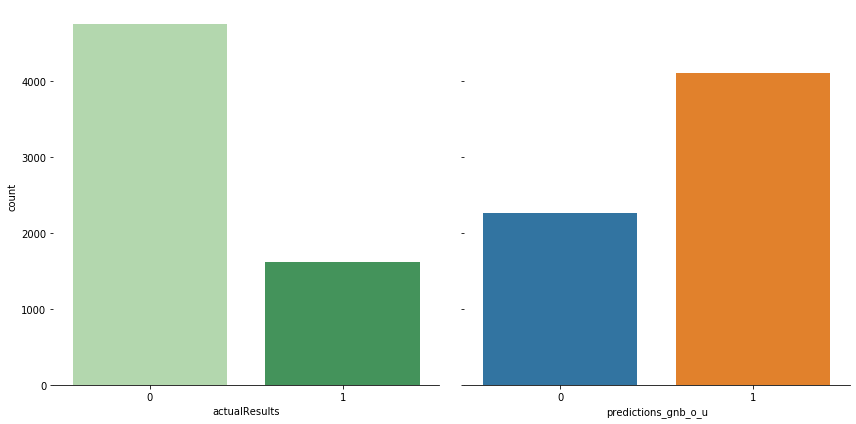

In [146]:
fig, axes = plt.subplots(1,2, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_gnb, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_gnb_o_u', data = results_gnb, ax=axes[1] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

Text(0.5, 1.0, 'Gaussian Naive Bayes Predictions after Removing Outliers and Undersampling')

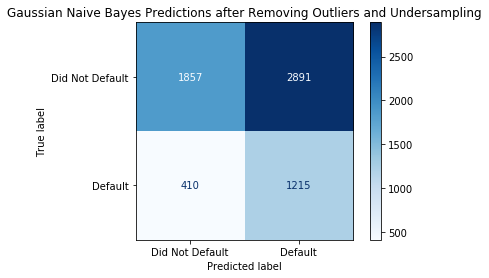

In [147]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(gnb_model, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("Gaussian Naive Bayes Predictions after Removing Outliers and Undersampling")

## AdaBoost - Outliers, Undersampling
x_train_under, y_train_under


In [148]:
# Ada Boost
modelName = 'ada_o_u'
ada_model = AdaBoostClassifier()
ada_model.fit(x_train_under, y_train_under)
predictions_ada=ada_model.predict(X_test)
results_ada = predDF(modelName,predictions_ada, y_test )
myMetrics(modelName, y_test, predictions_ada)

Index(['actualResults', 'predictions_ada_o_u'], dtype='object')
Recall : The ada_o_u model correctly identifed all customer who defaulted 0.62154 of the time.
F1score for ada_o_u model: 0.54981 
Precision for ada_o_u model: 0.49292 
Accuracy for ada_o_u model: 0.74047 


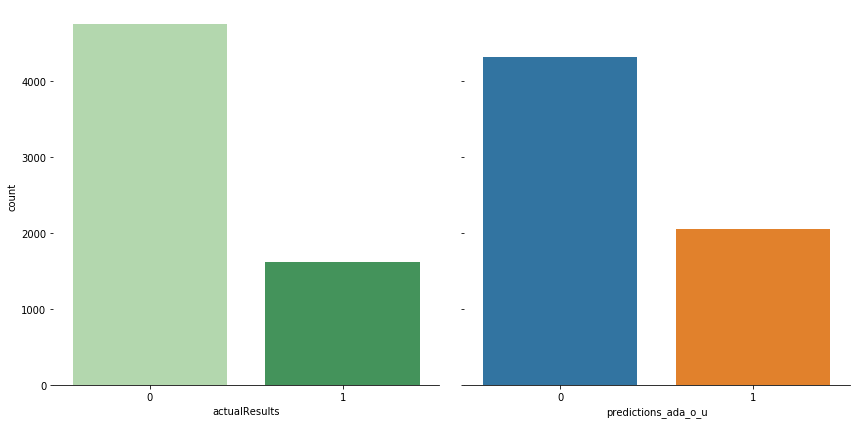

In [149]:
fig, axes = plt.subplots(1,2, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_ada, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_ada_o_u', data = results_ada, ax=axes[1] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

Text(0.5, 1.0, 'Ada Boost Predictions after Removing Outliers and Undersampling')

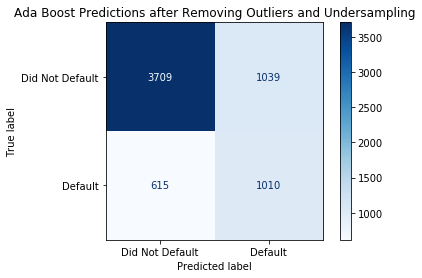

In [150]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(ada_model, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("Ada Boost Predictions after Removing Outliers and Undersampling")

## Gradient Tree Boosting - Outliers, Undersampling
x_train_under, y_train_under

In [151]:
# GTB Boost
modelName = 'gtb_o_u'
gtb_model = GradientBoostingClassifier()
gtb_model.fit(x_train_under, y_train_under)
predictions_gtb=gtb_model.predict(X_test)
results_gtb = predDF(modelName,predictions_gtb, y_test )
myMetrics(modelName, y_test, predictions_gtb)

Index(['actualResults', 'predictions_gtb_o_u'], dtype='object')
Recall : The gtb_o_u model correctly identifed all customer who defaulted 0.64369 of the time.
F1score for gtb_o_u model: 0.56221 
Precision for gtb_o_u model: 0.49905 
Accuracy for gtb_o_u model: 0.74439 


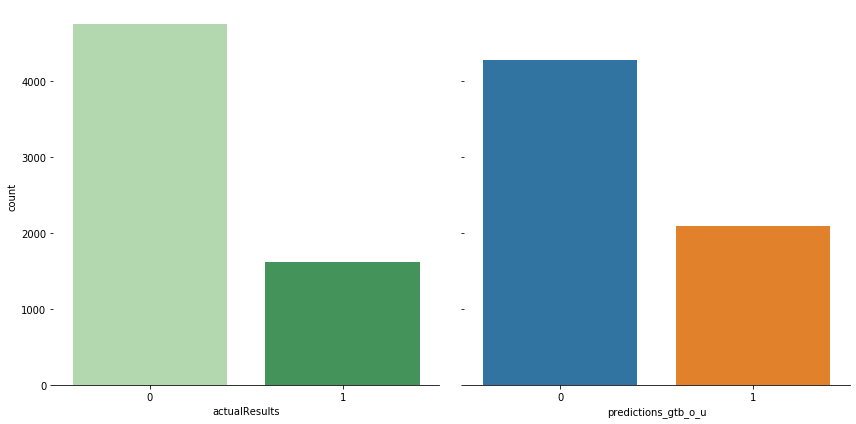

In [152]:
fig, axes = plt.subplots(1,2, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_gtb, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_gtb_o_u', data = results_gtb, ax=axes[1] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

Text(0.5, 1.0, 'Gradient Boosting Predictions after Removing Outliers and Undersampling')

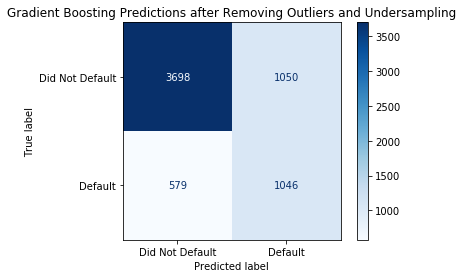

In [153]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(gtb_model, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("Gradient Boosting Predictions after Removing Outliers and Undersampling")

## Combined Bar Chart of Models: Actual vs Predictions

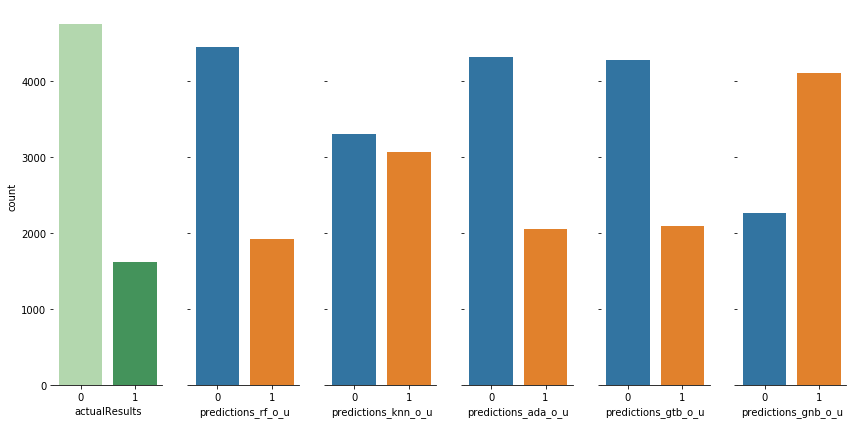

In [154]:
fig, axes = plt.subplots(1,6, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_rf, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_rf_o_u', data = results_rf, ax=axes[1] )
sns.countplot(x='predictions_knn_o_u', data = results_knn, ax=axes[2] )
sns.countplot(x='predictions_ada_o_u', data = results_ada, ax=axes[3] )
sns.countplot(x='predictions_gtb_o_u', data = results_gtb, ax=axes[4] )
sns.countplot(x='predictions_gnb_o_u', data = results_gnb, ax=axes[5] )


fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

#  Bagging Classifier - Gradient Boosted Trees


source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [155]:
from sklearn.ensemble import BaggingClassifier
gbt_bagged_o_u = BaggingClassifier(base_estimator=GradientBoostingClassifier(), n_estimators=10, random_state=0).fit(x_train_under, y_train_under)


In [156]:
#gtb_model.fit(x_train_under, y_train_under)
modelName = 'gtb_o_u_bagged'
predictions_gtb=gbt_bagged_o_u.predict(X_test)
results_gtb = predDF(modelName,predictions_gtb, y_test )
myMetrics(modelName, y_test, predictions_gtb)

Index(['actualResults', 'predictions_gtb_o_u_bagged'], dtype='object')
Recall : The gtb_o_u_bagged model correctly identifed all customer who defaulted 0.64554 of the time.
F1score for gtb_o_u_bagged model: 0.56126 
Precision for gtb_o_u_bagged model: 0.49645 
Accuracy for gtb_o_u_bagged model: 0.74266 


# Parameter Tuning - Random Forest

Main Parameters to adjust per Sci Kit Learn Documentation:

- n_estimators: number of trees in forest. (100)
 - larger, the better
- max_features:  size of the random subsets of features to consider when splitting a node
 - the lower, the greater the reduction of variance
 - the lower, greater the increase in bias
 - Empirical good default values are max_features="sqrt" (using a random subset of size sqrt(n_features)) for classification tasks (where n_features is the number of features in the data)
- Good results with max_depth=None in combination with min_samples_split=2 

source: https://scikit-learn.org/stable/modules/ensemble.html#forest , 1.11.2.3. Parameters¶


In [ ]:
print('Parameters currently in use:\n')
print(rf_model_beforeTuning.get_params())

# source: https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb

In [ ]:
# Random Search with Cross Validation¶

##from sklearn.model_selection import RandomizedSearchCV

# Number of trees (estimators) in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15,20,25,30,35,40]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = rf_model_beforeTuning

# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='neg_mean_absolute_error', # takes forever to run
                              cv = 10, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

In [ ]:
rf_random.best_params_


In [ ]:
rf_random.cv_results_


In [168]:
# random forest model with parameters from tuning
rf_model_afterTuning = RandomForestClassifier(n_estimators= 200,
 min_samples_split= 35,
 min_samples_leaf= 4,
 max_features= 'auto',
 max_depth= 20,
 bootstrap= False)

In [170]:
# Random Forest Model, after tuning 
modelName = 'rf_tuned'
rf_model = rf_model_afterTuning
rf_model.fit(x_train_under, y_train_under) # train_over
predictions_rf= rf_model.predict(X_test)
results_rf = predDF(modelName,predictions_rf, y_test )
myMetrics(modelName, y_test, predictions_rf)

Index(['actualResults', 'predictions_rf_tuned'], dtype='object')
Recall : The rf_tuned model correctly identifed all customer who defaulted 0.64062 of the time.
F1score for rf_tuned model: 0.55446 
Precision for rf_tuned model: 0.48873 
Accuracy for rf_tuned model: 0.73749 


Text(0.5, 1.0, 'Random Forest Model after Tuning')

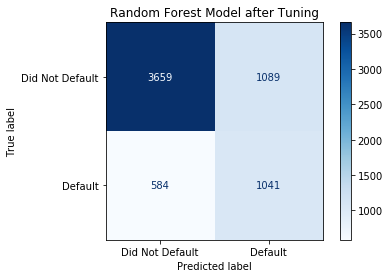

In [171]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(rf_model, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("Random Forest Model after Tuning")



# Random Forest Variable Importance

Variable Importance tells us which attributes relate to customer default rates.

This is based on Gini impurity/information gain (entropy). This approach is biased, favoring continuous variables and high cardinality categorical variables. None of our categorical variables have high cardinality (payment status has the most levels). 

source: https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

In [157]:
rf_model.feature_importances_


array([1.28793642e-02, 3.31644789e-04, 2.83377972e-03, 1.51690067e-04,
       7.92072848e-05, 2.97228012e-01, 1.98174584e-01, 1.12203698e-01,
       7.45372076e-02, 1.60144385e-01, 4.97556168e-02, 8.17388118e-03,
       1.55119580e-03, 4.36759624e-03, 5.74309664e-04, 1.33074032e-03,
       6.18059816e-04, 2.36767175e-02, 1.97255819e-02, 8.61453513e-03,
       1.15619488e-02, 1.14862441e-02])

Feature ranking:
1. feature 5 (pay1) (0.211241)
2. feature 6 (pay2) (0.091547)
3. feature 7 (pay3) (0.068529)
4. feature 11 (bill1) (0.052677)
5. feature 0 (limit) (0.047423)
6. feature 17 (paid1) (0.047032)
7. feature 18 (paid2) (0.044814)
8. feature 8 (pay4) (0.044640)
9. feature 12 (bill2) (0.041831)
10. feature 19 (paid3) (0.038087)
11. feature 20 (paid4) (0.036787)
12. feature 13 (bill3) (0.035491)
13. feature 14 (bill4) (0.033686)
14. feature 15 (bill5) (0.032388)
15. feature 16 (bill6) (0.032311)
16. feature 10 (pay6) (0.032056)
17. feature 4 (age) (0.031153)
18. feature 9 (pay5) (0.028874)
19. feature 21 (paid5) (0.026496)
20. feature 2 (edu) (0.009615)
21. feature 3 (marriage) (0.007144)
22. feature 1 (sex) (0.006176)


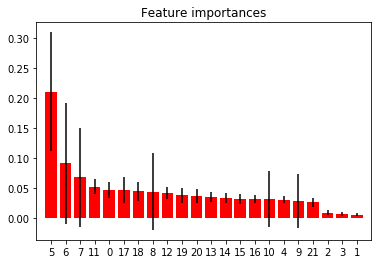

Index(['limit', 'sex', 'edu', 'marriage', 'age', 'pay1', 'pay2', 'pay3',
       'pay4', 'pay5', 'pay6', 'bill1', 'bill2', 'bill3', 'bill4', 'bill5',
       'bill6', 'paid1', 'paid2', 'paid3', 'paid4', 'paid5'],
      dtype='object')


In [172]:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train_under.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1, indices[f], x_train_under.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train_under.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()
from pprint import pprint
pprint(x_train_under.columns)

In [158]:
X_test.columns

Index(['limit', 'sex', 'edu', 'marriage', 'age', 'pay1', 'pay2', 'pay3',
       'pay4', 'pay5', 'pay6', 'bill1', 'bill2', 'bill3', 'bill4', 'bill5',
       'bill6', 'paid1', 'paid2', 'paid3', 'paid4', 'paid5'],
      dtype='object')

In [159]:
X_test.iloc[0:0,:]

,limit,sex,edu,marriage,age,pay1,pay2,pay3,pay4,pay5,...,bill2,bill3,bill4,bill5,bill6,paid1,paid2,paid3,paid4,paid5


In [96]:
indices

array([ 5,  6, 11,  0, 12, 13,  4, 14, 16, 15,  7,  8,  9, 10,  2,  3,  1])


age, pay1,

In [81]:
X_test.iloc[0:0, [ 5,  6, 11, 12, 13,  0, 14]]

,pay1,pay2,paid1,paid2,paid3,limit,paid4


In [97]:
X_test.iloc[0:0, [5,  6, 11,  0, 12, 13,  4, 14]]

,pay1,pay2,paid1,limit,paid2,paid3,age,paid4


# Stacking Models

In [175]:
estimators = [('rf_tuned', rf_model_afterTuning),
...               ('gbt_bagged_o_u', gbt_bagged_o_u),
...               ('knn', KNeighborsClassifier(n_neighbors=3))]

In [176]:
from sklearn.ensemble import StackingClassifier


clf_stacked = StackingClassifier(estimators=estimators, final_estimator=None)

In [177]:
clf_stacked.fit(x_train_under, y_train_under).score(X_test, y_test)

0.7401537737329358

In [180]:
modelName = 'stacked_models'
predictions_stacked=clf_stacked.predict(X_test)
results_stacked = predDF(modelName,predictions_stacked, y_test )
myMetrics(modelName, y_test, predictions_stacked)

Index(['actualResults', 'predictions_stacked_models'], dtype='object')
Recall : The stacked_models model correctly identifed all customer who defaulted 0.65477 of the time.
F1score for stacked_models model: 0.56237 
Precision for stacked_models model: 0.49282 
Accuracy for stacked_models model: 0.74015 


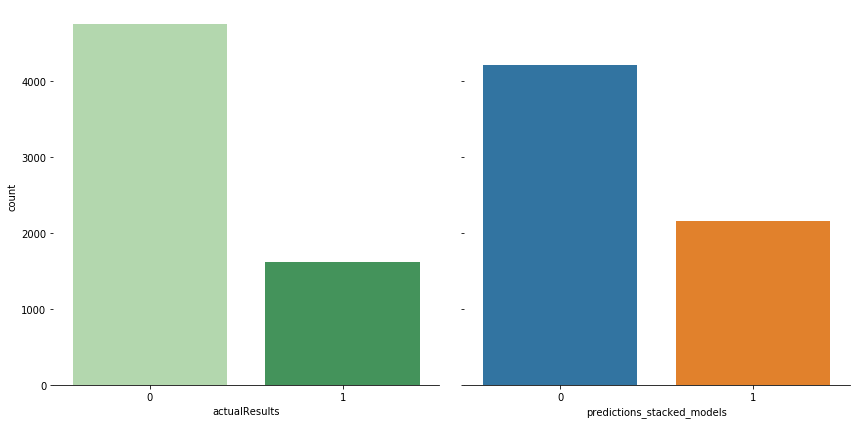

In [183]:
fig, axes = plt.subplots(1,2, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_rf, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_stacked_models', data = results_stacked, ax=axes[1] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

Text(0.5, 1.0, 'Stacked Models')

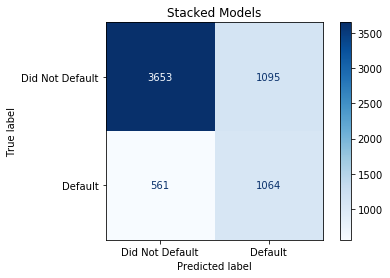

In [184]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(clf_stacked, X_test, y_test,
                                 display_labels=["Did Not Default","Default"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

disp.ax_.set_title("Stacked Models")